In [1]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import matplotlib.colors as colors
import pandas as pd
from fix_grid import fix_grid 

In [ ]:
### Plan: absolute Flüsse korrelieren von FO2,FCO2
### dann gefilterte Flüsse korrelieren vs MA korreliert

In [2]:
pathp='/gxfs_home/geomar/smomw577/plots/Boxcar/0181-0190/'
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/'
ds    =xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/MOM5_control_monthly_0181-0190_noice_all.nc', chunks='auto')
ds_cc =xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/MOM5_1PctTo2X_monthly_0181-0190_noice_all.nc', chunks='auto')
dsa   =xr.open_dataset(pathf+'3x3box_mean_anomaly_monthly_0181-0190_all.nc', chunks='auto')
corr  =xr.open_dataset(pathf+'3x3box_mean_corr_monthly_0181-0190_all.nc', chunks='auto')

ds    =fix_grid(ds)
ds_cc =fix_grid(ds_cc)
dsa   =fix_grid(dsa)
corr  =fix_grid(corr)

In [6]:
corr_ctrl=xr.corr(ds.o2_stf, ds.dic_stf, dim='time').compute()
corr_cc=xr.corr(ds_cc.o2_stf, ds_cc.dic_stf, dim='time').compute()

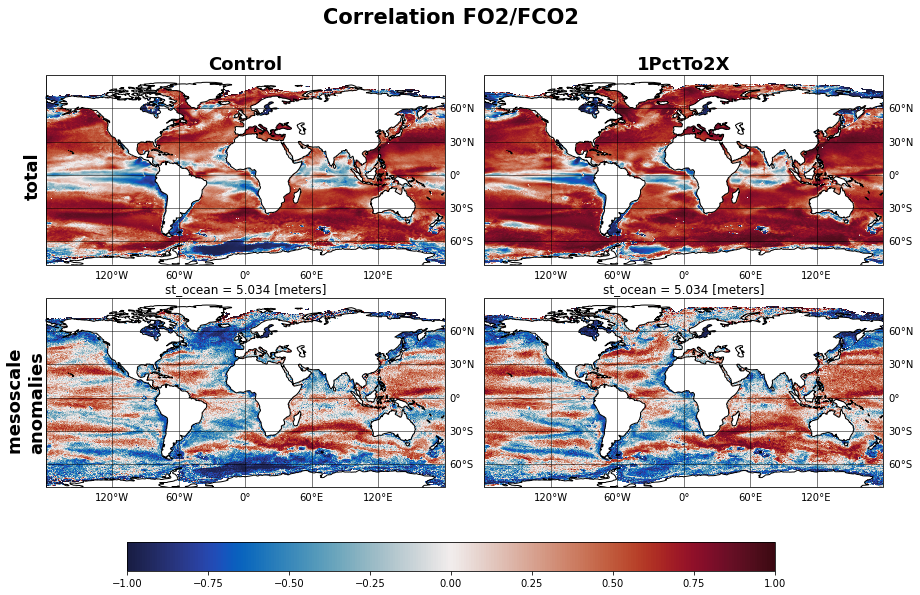

In [11]:
fig, axs= plt.subplots(nrows=2, ncols=2 , figsize=(15,8),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im= corr_ctrl.plot(ax=axs[0],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),add_colorbar=False)
corr_cc.plot(ax=axs[1], vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),add_colorbar=False)
corr.corr_o2_stf_dic_stf.plot(ax=axs[2],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),add_colorbar=False)
corr.corr_o2_stf_dic_stf_1PctTo2X.plot(ax=axs[3], vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),add_colorbar=False)

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

for i in range(4):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Control', fontsize=18, fontweight='bold');
axs[1].set_title('1PctTo2X', fontsize=18, fontweight='bold');
plt.subplots_adjust(hspace=0.05, wspace=0.1)

axs[0].text(-200, 0, 'total', fontweight='bold', fontsize=18, rotation='vertical', va='center')
axs[2].text(-215, 0, 'mesoscale \nanomalies', fontweight='bold', fontsize=18, rotation='vertical', va='center')

plt.suptitle('Correlation FO2/FCO2', fontweight='bold', fontsize=21);
plt.savefig(pathp+'co2_o2_abs_and_meso_corr.png', dpi=300, bbox_inches='tight');

# smoothed field

In [8]:
ds_smoothed=xr.open_dataset(pathf+'3x3box_mean_monthly_0181-0190_noice_all.nc', chunks='auto')
ds_smoothed=fix_grid(ds_smoothed)

In [9]:
mask=corr_ctrl.notnull()

In [10]:
ds_smoothed

<xarray.Dataset>
Dimensions:             (time: 120, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * time                (time) object 0181-01-16 12:00:00 ... 0190-12-16 12:0...
  * xt_ocean            (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * yt_ocean            (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.94 89.98
    st_ocean            float64 ...
    geolat_t            (yt_ocean, xt_ocean) float64 -81.11 -81.11 ... 65.02
    geolon_t            (yt_ocean, xt_ocean) float64 -279.9 -279.8 ... 80.0 80.0
Data variables: (12/16)
    SST_1PctTo2X        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    SSH_1PctTo2X        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    dic_stf_1PctTo2X    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    o2_stf_1PctTo2X     (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    sens_heat_1PctTo2X  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    evap_heat_1PctTo2X  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    ...                  ...
    dic_stf             (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    o2_stf              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    sens_heat           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    evap_heat           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    mld                 (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(36, 835, 1114), meta=np.ndarray>
    jp_all              (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(29, 657, 878), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 2.4.2 (https://mpimet.mpg....
    Conventions:    CF-1.6
    long_name:      sea surface temperature
    units:          deg-C
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    history:        Mon Mar 10 17:31:20 2025: cdo merge 3x3box_mean_monthly_0...
    CDO:            Climate Data Operators version 2.4.2 (https://mpimet.mpg....

In [12]:
ds_smoothed=ds_smoothed.where(mask)

In [13]:
corr_smoothed_ctrl=xr.corr(ds_smoothed.o2_stf, ds_smoothed.dic_stf, dim='time')
corr_smoothed_cc=xr.corr(ds_smoothed.o2_stf_1PctTo2X, ds_smoothed.dic_stf_1PctTo2X, dim='time')

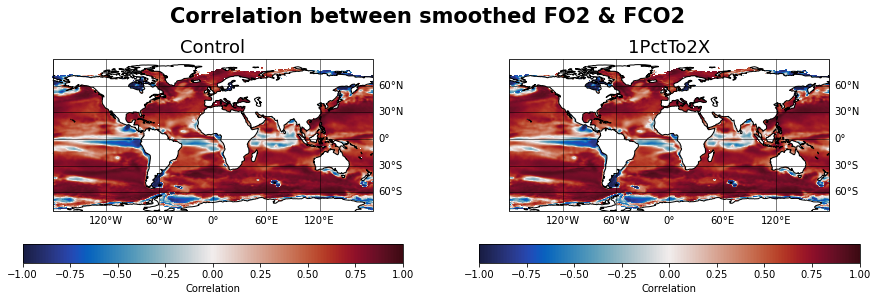

In [14]:
fig, axs= plt.subplots(nrows=1, ncols=2 , figsize=(15,4),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
corr_smoothed_ctrl.plot(ax=axs[0],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation",'extend':None})
corr_smoothed_cc.plot(ax=axs[1], vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation", 'extend':None})


for i in range(2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Control', fontsize=18);
axs[1].set_title('1PctTo2X', fontsize=18);
plt.suptitle('Correlation between smoothed FO2 & FCO2', fontweight='bold', fontsize=21, y=1.06);
plt.savefig(pathp+'co2_o2_corr_smoothed.png', dpi=300, bbox_inches='tight');